In [0]:
# ONLY for Google Colab Use, because the local data can not be accessed, therefore must be downloaded to the Colab Cloud
# https://medium.com/@acpanjan/download-google-drive-files-using-wget-3c2c025a8b99
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1xTyYLM6lymb07HJf8AXjRXYrShUJ9aJ-' -O data.zip

In [0]:
# ONLY for Google Colab Use to unzip downloaded data
!unzip data.zip


Image Dimensions = 11368
Training with k = 10
epoch [500/2000], loss:0.0400, MSE_loss:0.0400
epoch [1000/2000], loss:0.0308, MSE_loss:0.0308
epoch [1500/2000], loss:0.0215, MSE_loss:0.0215
epoch [2000/2000], loss:0.0192, MSE_loss:0.0192
reconstruction error:  14.583060014464547
reconstruction error:  22.211842979001574
reconstruction error:  16.42193864832065
reconstruction error:  15.951835582961495
reconstruction error:  19.035010216687958
reconstruction error:  18.06172085032466
reconstruction error:  16.758740722634684
reconstruction error:  16.748529454696545
reconstruction error:  12.081271019390497
reconstruction error:  17.479058585645628
reconstruction error:  16.19949034734626
reconstruction error:  13.993590915636144
reconstruction error:  14.825383008513683
reconstruction error:  15.720116775431103
reconstruction error:  14.25839316902308


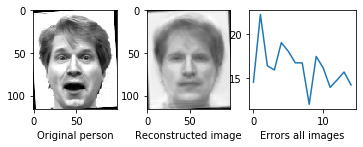

Mean error 16.288665486005232
Training with k = 75
epoch [500/2000], loss:0.0168, MSE_loss:0.0168
epoch [1000/2000], loss:0.0088, MSE_loss:0.0088
epoch [1500/2000], loss:0.0048, MSE_loss:0.0048
epoch [2000/2000], loss:0.0028, MSE_loss:0.0028
reconstruction error:  6.8375798135720816
reconstruction error:  13.03664949220403
reconstruction error:  11.978138704388815
reconstruction error:  11.173790127629747
reconstruction error:  13.710809174279708
reconstruction error:  13.356076958041049
reconstruction error:  10.743051158819245
reconstruction error:  8.544471035809213
reconstruction error:  6.818075752896335
reconstruction error:  11.419036036447585
reconstruction error:  10.917616353094413
reconstruction error:  9.156714743111605
reconstruction error:  10.115514100716048
reconstruction error:  11.254676683787576
reconstruction error:  11.265649754603693


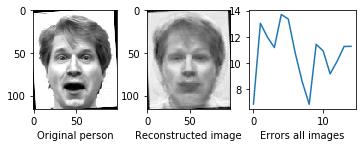

Mean error 10.688523325960075
Training with k = 150
epoch [500/2000], loss:0.0120, MSE_loss:0.0120
epoch [1000/2000], loss:0.0055, MSE_loss:0.0055
epoch [1500/2000], loss:0.0021, MSE_loss:0.0021
epoch [2000/2000], loss:0.0007, MSE_loss:0.0007
reconstruction error:  4.0948278247382905
reconstruction error:  11.930510218039379
reconstruction error:  11.206246938491066
reconstruction error:  10.532393236240756
reconstruction error:  13.095660746047527
reconstruction error:  12.314366101035356
reconstruction error:  10.111150826622302
reconstruction error:  7.936027641516394
reconstruction error:  5.998461576645877
reconstruction error:  10.890008294403808
reconstruction error:  10.14252859270676
reconstruction error:  8.727970856510215
reconstruction error:  9.218384165076973
reconstruction error:  10.31511081243331
reconstruction error:  10.36015530936538


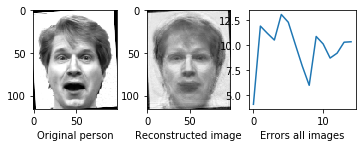

Mean error 9.791586875991559


In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import torch
from torch import nn
from torch.autograd import Variable

dimensions = [10, 75, 150]

def load_images(path: str, file_ending: str=".png") -> (list, int, int):
    """
    Load all images in path with matplotlib that have given file_ending

    Arguments:
    path: path of directory containing image files that can be assumed to have all the same dimensions
    file_ending: string that image files have to end with, if not->ignore file

    Return:
    images: list of images (each image as numpy.ndarray and dtype=float64)
    dimension_x: size of images in x direction
    dimension_y: size of images in y direction
    """

    images = []

    # TODO read each image in path as numpy.ndarray and append to images
    # Useful functions: lib.list_directory(), matplotlib.image.imread(), numpy.asarray()

    files = os.listdir(path)
    files.sort()
    for cur in files:
        if not cur.endswith(file_ending):
            continue

        try:
            image = mpl.image.imread(path + cur)
            img_mtx = np.asarray(image, dtype="float64")
            images.append(img_mtx)
        except:
            continue

    dimension_y = images[0].shape[0]
    dimension_x = images[0].shape[1]

    return images, dimension_x, dimension_y


class Autoencoder(nn.Module):
    def __init__(self, k):
        super(Autoencoder, self).__init__()
        # TODO YOUR CODE HERE
        self.n_h0 = x * y
        self.n_h1 = k
        self.n_h2 = self.n_h0
        self.fc1 = nn.Linear(self.n_h0,self.n_h1)
        self.fc2 = nn.Linear(self.n_h1,self.n_h2)

    def forward(self, x):
        # TODO YOUR CODE HERE
        x = self.fc1(x)
        x = self.fc2(x)

        return x



if __name__ == '__main__':

    images, x, y = load_images('./data/train/')
    print("Image Dimensions =", str(x*y))
    # setup data matrix
    D = np.zeros((len(images), images[0].size), dtype=np.float32)
    for i in range(len(images)):
        D[i, :] = images[i].flatten()

    # 1. calculate and subtract mean to center the data in D
    # TODO YOUR CODE HERE
    mean_data = np.mean(D, axis=0)
    D = D - mean_data

    # CHANGED CODE: All data loading first, so the different ks can be tested in a loop
    images_test, x, y = load_images('./data/test/')
    D_test = np.zeros((len(images_test), images_test[0].size), dtype=np.float32)
    for i in range(len(images_test)):
        D_test[i, :] = images_test[i].flatten()

    for i in range(D_test.shape[0]):
        D_test[i, :] -= mean_data

    data_test = torch.from_numpy(D_test)

    num_epochs = 2000
    batch_size = 50
    learning_rate = 0.01
    display_ith_loss = 500

    data = torch.from_numpy(D)
    for k in dimensions:
        print("================================================================")
        print("Training with k =", str(k))
        print("================================================================")

        #model = Autoencoder()
        # ADDON fot gpu setup
        use_cuda = torch.cuda.is_available()
        device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        model = Autoencoder(k).to(device)

        criterion = nn.MSELoss()
        optimizer = torch.optim.Adam(
          model.parameters(), lr=learning_rate, weight_decay=1e-05)
    
    for epoch in range(num_epochs):
        data = Variable(data)
        # ADDON for gpu
        data = data.to(device)
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        MSE_loss = nn.MSELoss()(output, data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # ===================log========================
        if (epoch+1) % display_ith_loss == 0:
            print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
                  .format(epoch + 1, num_epochs, loss.data, MSE_loss.data))

      # now we use the nn model to reconstruct test images
      # and measure their reconstruction error

      
      errors = []
        for i, test_image in enumerate(images_test):
            # evaluate the model using data_test samples i
            # pred = ...
            # add the mean to the predicted/reconstructed image
            # and reshape to size (116,98)
            # TODO YOUR CODE HERE
            # ADDON for gpu
            input_test = data_test[i].to(device)
            pred = model(input_test)
            pred_np = pred.data.cpu().numpy()
            pred_np += mean_data
            img_reconst = pred_np.reshape((116, 98))

            # uncomment
            error = np.linalg.norm(images_test[i] - img_reconst)
            errors.append(error)
            print("reconstruction error: ", error)

        grid = plt.GridSpec(2, 9)

        plt.subplot(grid[0, 0:3])
        plt.imshow(images_test[14], cmap='Greys_r')
        plt.xlabel('Original person')

        # ADDON for gpu
        input_re = data_test[14, :].to(device)
        pred = model(input_re)
        pred_np = pred.data.cpu().numpy()
        pred_np += mean_data
        img_reconst = pred_np.reshape((116, 98))
        plt.subplot(grid[0, 3:6])
        plt.imshow(img_reconst, cmap='Greys_r')
        plt.xlabel('Reconstructed image')

        plt.subplot(grid[0, 6:])
        plt.plot(np.arange(len(images_test)), errors)
        plt.xlabel('Errors all images')

        plt.savefig("pca_ae_solutionk"+str(k)+".png")
        plt.show()

        print("Mean error", np.asarray(errors).mean())


# Testing Non-Linear Autoencoder

Image Dimensions = 11368
Training with k = 10
epoch [500/2000], loss:0.0662, MSE_loss:0.0662
epoch [1000/2000], loss:0.0662, MSE_loss:0.0662
epoch [1500/2000], loss:0.0663, MSE_loss:0.0663
epoch [2000/2000], loss:0.0662, MSE_loss:0.0662
reconstruction error:  25.48015757804932
reconstruction error:  39.43009550300261
reconstruction error:  24.626016206080266
reconstruction error:  31.01013420040074
reconstruction error:  34.74800388801934
reconstruction error:  28.766617239128493
reconstruction error:  22.8091298480948
reconstruction error:  26.959447948421264
reconstruction error:  21.149784296497337
reconstruction error:  34.96267089270246
reconstruction error:  23.046692559085777
reconstruction error:  25.091708379027295
reconstruction error:  31.78476115033989
reconstruction error:  27.837086856803744
reconstruction error:  26.558049730061626


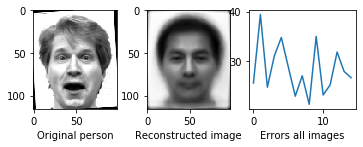

Mean error 28.284023751714333
Training with k = 75
epoch [500/2000], loss:0.0662, MSE_loss:0.0662
epoch [1000/2000], loss:0.0662, MSE_loss:0.0662
epoch [1500/2000], loss:0.0662, MSE_loss:0.0662
epoch [2000/2000], loss:0.0662, MSE_loss:0.0662
reconstruction error:  25.48147769613136
reconstruction error:  39.43081134268969
reconstruction error:  24.62468181727137
reconstruction error:  31.009243634896436
reconstruction error:  34.74655250109012
reconstruction error:  28.768138688517826
reconstruction error:  22.80912204644261
reconstruction error:  26.958649354575268
reconstruction error:  21.14852069856183
reconstruction error:  34.96049546060333
reconstruction error:  23.04571700068144
reconstruction error:  25.094126687147078
reconstruction error:  31.785592623047652
reconstruction error:  27.837624023888168
reconstruction error:  26.55845621928869


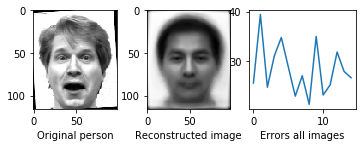

Mean error 28.283947319655525
Training with k = 150
epoch [500/2000], loss:0.0662, MSE_loss:0.0662
epoch [1000/2000], loss:0.0662, MSE_loss:0.0662
epoch [1500/2000], loss:0.0662, MSE_loss:0.0662
epoch [2000/2000], loss:0.0389, MSE_loss:0.0389
reconstruction error:  22.351006750133294
reconstruction error:  23.035334730238244
reconstruction error:  23.300057378438105
reconstruction error:  18.67692722064045
reconstruction error:  25.824660259915607
reconstruction error:  28.043207672377076
reconstruction error:  18.986436165135213
reconstruction error:  21.259322905326687
reconstruction error:  18.73668920413427
reconstruction error:  22.167772760431237
reconstruction error:  21.876818130585132
reconstruction error:  22.375215693366858
reconstruction error:  19.28535175899737
reconstruction error:  25.187870824286282
reconstruction error:  23.62349268436457


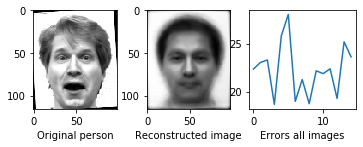

Mean error 22.31534427589136


In [0]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import torch
from torch import nn
from torch.autograd import Variable
import torch.nn.functional as F


dimensions = [10, 75, 150]

def load_images(path: str, file_ending: str=".png") -> (list, int, int):
    """
    Load all images in path with matplotlib that have given file_ending

    Arguments:
    path: path of directory containing image files that can be assumed to have all the same dimensions
    file_ending: string that image files have to end with, if not->ignore file

    Return:
    images: list of images (each image as numpy.ndarray and dtype=float64)
    dimension_x: size of images in x direction
    dimension_y: size of images in y direction
    """

    images = []

    # TODO read each image in path as numpy.ndarray and append to images
    # Useful functions: lib.list_directory(), matplotlib.image.imread(), numpy.asarray()

    files = os.listdir(path)
    files.sort()
    for cur in files:
        if not cur.endswith(file_ending):
            continue

        try:
            image = mpl.image.imread(path + cur)
            img_mtx = np.asarray(image, dtype="float64")
            images.append(img_mtx)
        except:
            continue

    dimension_y = images[0].shape[0]
    dimension_x = images[0].shape[1]

    return images, dimension_x, dimension_y


class NL_Autoencoder(nn.Module):
    def __init__(self, k):
        super(NL_Autoencoder, self).__init__()
        # TODO YOUR CODE HERE
        self.n_h0 = x * y
        self.n_h1 = self.n_h0//10
        self.n_h2 = k
        self.n_h3 = self.n_h1
        self.n_h4 = self.n_h0
        self.fc1 = nn.Linear(self.n_h0,self.n_h1)
        self.fc2 = nn.Linear(self.n_h1,self.n_h2)
        self.fc3 = nn.Linear(self.n_h2,self.n_h3)
        self.fc4 = nn.Linear(self.n_h3,self.n_h4)

    def forward(self, x):
        # TODO YOUR CODE HERE
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)

        return x



if __name__ == '__main__':

    images, x, y = load_images('./data/train/')
    print("Image Dimensions =", str(x*y))
    # setup data matrix
    D = np.zeros((len(images), images[0].size), dtype=np.float32)
    for i in range(len(images)):
    D[i, :] = images[i].flatten()

    # 1. calculate and subtract mean to center the data in D
    # TODO YOUR CODE HERE
    mean_data = np.mean(D, axis=0)
    D = D - mean_data

    # CHANGED CODE: All data loading first, so the different ks can be tested in a loop
    images_test, x, y = load_images('./data/test/')
    D_test = np.zeros((len(images_test), images_test[0].size), dtype=np.float32)
    for i in range(len(images_test)):
    D_test[i, :] = images_test[i].flatten()

    for i in range(D_test.shape[0]):
    D_test[i, :] -= mean_data

    data_test = torch.from_numpy(D_test)

    num_epochs = 2000
    batch_size = 50
    learning_rate = 0.01
    display_ith_loss = 500

    data = torch.from_numpy(D)
    for k in dimensions:
    print("================================================================")
    print("Training with k =", str(k))
    print("================================================================")

    #model = Autoencoder()
    # ADDON fot gpu setup
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    model = NL_Autoencoder(k).to(device)

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(
      model.parameters(), lr=learning_rate, weight_decay=1e-05)

    for epoch in range(num_epochs):
        data = Variable(data)
        # ADDON for gpu
        data = data.to(device)
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        MSE_loss = nn.MSELoss()(output, data)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # ===================log========================
        if (epoch+1) % display_ith_loss == 0:
            print('epoch [{}/{}], loss:{:.4f}, MSE_loss:{:.4f}'
              .format(epoch + 1, num_epochs, loss.data, MSE_loss.data))

    # now we use the nn model to reconstruct test images
    # and measure their reconstruction error


    errors = []
    for i, test_image in enumerate(images_test):

        # evaluate the model using data_test samples i
        # pred = ...
        # add the mean to the predicted/reconstructed image
        # and reshape to size (116,98)
        # TODO YOUR CODE HERE
        # ADDON for gpu
        input_test = data_test[i].to(device)
        pred = model(input_test)
        pred_np = pred.data.cpu().numpy()
        pred_np += mean_data
        img_reconst = pred_np.reshape((116, 98))

        # uncomment
        error = np.linalg.norm(images_test[i] - img_reconst)
        errors.append(error)
        print("reconstruction error: ", error)

    grid = plt.GridSpec(2, 9)

    plt.subplot(grid[0, 0:3])
    plt.imshow(images_test[14], cmap='Greys_r')
    plt.xlabel('Original person')

    # ADDON for gpu
    input_re = data_test[14, :].to(device)
    pred = model(input_re)
    pred_np = pred.data.cpu().numpy()
    pred_np += mean_data
    img_reconst = pred_np.reshape((116, 98))
    plt.subplot(grid[0, 3:6])
    plt.imshow(img_reconst, cmap='Greys_r')
    plt.xlabel('Reconstructed image')

    plt.subplot(grid[0, 6:])
    plt.plot(np.arange(len(images_test)), errors)
    plt.xlabel('Errors all images')

    plt.savefig("pca_nl_ae_solutionk"+str(k)+".png")
    plt.show()

    print("Mean error", np.asarray(errors).mean())
